# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


Based on [this](https://stackoverflow.com/a/22149930/1899061), in all computations, `axis=...` refers to the axis **along which** the computation is done. By default, `axis=0`. This is consistent with the `numpy.mean` usage when axis is specified explicitly (in `numpy.mean`, `axis==None` by default, which computes the mean value over the flattened array), in which `axis=0` along the rows (namely, index in pandas), and `axis=1` along the columns.
Note also that that `axis=0` indicates aggregating along rows and `axis=1` indicates aggregating along columns. This is consistent with how we index into a dataframe. In `df.iloc[<row>, <column>]`, `<row>` is in index position 0 and `<column>` is in index position 1. For added clarity, one may choose to specify `axis='index'` (instead of `axis=0`) or `axis='columns'` (instead of `axis=1`).
**But**, `axis=0` means each row as a bulk - we manipulate a `pd.DataFrame` inter-row, instead of within-row. Likewise, 1 means each column as a bulk, i.e. we manipulate a `pd.DataFrame` inter-column instead of within-column. For example, `<pd.df>.drop("A", axis=1)` will drop a whole column.

### Reading the dataset
- `pd.read_csv()`

### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

##### Missing values and value counts
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()` (shows only the rows without NAs (default: dropna=True), check shape)
- `<pd.df>['<column>'].value_counts(normalize=True)` (show proportions, rather than frequencies)
- `<pd.Series>.dropna(how='all'/'any', inplace=True)` (return a new `<pd.Series>` object with missing values removed)

The `cmap` parameter of `sb.heatmap()` denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of `<column>` is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


### Data transformations
- `<pd.df>.describe()`
- `pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
- `<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the `<column>`; for example, each element of the `<column>` can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns.
- `sb.heatmap()`
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic does not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb* (the last line is added subsequently):

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%config IPCompleter.greedy=True

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import seaborn as sb

from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_histogram, theme_xkcd, coord_cartesian, xlim, ylim, xlab, ylab, ggtitle, theme

In [ ]:
# %run "import_packages.ipynb"

## Introducing The Rolling Stones datasets

### Available datasets
The starting set of The Rolling Stones datasets, located in the *data* folder:
* *rolling_stones_spotify.csv* - Spotify audio features collected from playlists
* *stones.csv* - complete raw dataset (including data from Spotify, Wikipedia, AllMusic, etc.)
* *stones_analysis.csv* - clean dataset (no NAs, no duplicates,...)

### Read a *csv* file containing one of the available datasets describing The Rolling Stones songs
`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [105]:
# Get the songs as a pd.DataFrame object from 'data/stones.csv', 
# or from '../data/stones.csv', 
# or '../../data/stones.csv', 
# or ..., 
# depending on where the csv file is located
songs = pd.read_csv('../data/stones.csv')

# If an int column contains NaN values, read_csv() sets all values to float values, because NaN are internally
# represented as float values. To read the int columns as int values and still preserve NaN values where they 
# exist, see this: https://stackoverflow.com/a/72323514. 
# The trick is: df = pd.read_csv('file.csv', dtype={'a': 'Int32', 'b': 'Int32'}), assuming that 'a' and 'b' 
# columns contain int and NaN values.

### Explore the dataset (first steps)

##### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

###### A sneak peek into the dataset
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, **<u>`<pd.df>.info()`**</u>, `<pd.df>.describe()` (shows descriptive statistics for numerical columns only).

When calling `display()` on a method like `<pd.df>.head()`, `<pd.df>.tail()` and `<pd.df>.sample()`, only a certain default number of columns is displayed. To display *all* columns, use `pd.set_option('display.max_columns', None)` first. To display `<n>` columns, use `pd.set_option('display.max_columns', <n>)` first. 

In [9]:
songs.shape
songs.sample(3)
songs.head()
songs.tail()
songs.dtypes
songs.info()
songs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             297 non-null    object 
 1   Year_recorded     297 non-null    int64  
 2   Year_released     297 non-null    int64  
 3   Album             297 non-null    object 
 4   Album_type        297 non-null    object 
 5   Record_label      297 non-null    object 
 6   Track_number      293 non-null    float64
 7   Duration          293 non-null    object 
 8   Songwriter        297 non-null    object 
 9   Lead_vocal        297 non-null    object 
 10  acousticness      281 non-null    float64
 11  danceability      281 non-null    float64
 12  energy            281 non-null    float64
 13  instrumentalness  281 non-null    float64
 14  liveness          281 non-null    float64
 15  loudness          281 non-null    float64
 16  speechiness       281 non-null    float64
 1

,Year_recorded,Year_released,Track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,297.000000,297.000000,293.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,1978.117845,1978.811448,6.638225,0.270074,0.522416,0.732898,0.142892,0.261473,-7.112119,0.055053,124.231587,0.638497
std,14.226554,14.266461,3.761581,0.247631,0.126368,0.192342,0.255340,0.202501,3.206846,0.036825,30.115263,0.219224
min,1963.000000,1964.000000,1.000000,0.000058,0.230000,0.129000,0.000000,0.024500,-24.466000,0.023200,57.772000,0.042700
25%,1966.000000,1967.000000,4.000000,0.061100,0.431000,0.576000,0.000201,0.109000,-9.335000,0.033000,104.528000,0.511000
50%,1973.000000,1974.000000,6.000000,0.187000,0.518000,0.769000,0.006910,0.204500,-6.493000,0.042900,118.944000,0.668000
75%,1989.000000,1989.000000,9.000000,0.451000,0.618000,0.906000,0.138000,0.351000,-4.504000,0.060100,140.814000,0.820000
max,2015.000000,2016.000000,18.000000,0.994000,0.835000,0.997000,0.977000,0.978000,-1.426000,0.306000,217.578000,0.973000


###### Columns
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`

Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [14]:
# Get the columns as a pd.Index object, using <pd.df>.columns
songs.columns
# Get the columns as a list, using list(<pd.df>.columns)
songs.columns.tolist()
# Get the columns as a list, using <pd.df>.columns.tolist() or <pd.df>.columns.to_list()
list(songs.columns)
# Get the columns as a numpy.ndarray object, using <pd.df>.columns.values or np.array(<pd.df>.columns)
songs.columns.values
# Get the values of all items in the dataset as a numpy.ndarray of lists of the values in each item, using <pd.df>.values (the type is numpy.ndarray)
songs.values

array([['19th Nervous Breakdown', 1965, 1966, ..., '9', '-', '-'],
       ['100 Years Ago', 1972, 1973, ..., '-', '-', '-'],
       ['2000 Light Years From Home', 1967, 1967, ..., '-', '-', '-'],
       ...,
       ['You Got Me Rocking', 1993, 1994, ..., '29', '32', '-'],
       ['You Got The Silver', 1969, 1969, ..., '-', '-', '-'],
       ['You Gotta Move', 1969, 1971, ..., '-', '-', '-']], dtype=object)

###### Renaming columns
- `<pd.df>.rename(columns={'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, inplace=True)`, or
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns', inplace=True)`;
- `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in `<pd.df>`)

In [16]:
# Rename the Duration column to Length and Album to Album_title
songs.rename(columns={'Duration': 'Length', 'Album': 'Album_title'}, inplace=True)
songs
# Rename the Length column back to Duration and Album_title back to Album
songs.rename(columns={'Album_title': 'Album', 'Length': 'Duration'}, inplace=True)
songs

,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,...,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
0,19th Nervous Breakdown,1965,1966,Got Live If You Want It!,Live,ABKCO Records / Universal,8.0,3:31,Jagger/Richards,Jagger,...,2,-,2,1,2,19,-,9,-,-
1,100 Years Ago,1972,1973,Goats Head Soup,Studio,Interscope / Polydor,2.0,3:58,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
2,2000 Light Years From Home,1967,1967,Their Satanic Majesties Request,Studio,ABKCO Records,9.0,4:45,Jagger/Richards,Jagger,...,-,-,-,5,3,-,-,-,-,-
3,2000 Man,1967,1967,Their Satanic Majesties Request,Studio,ABKCO Records,4.0,3:07,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
4,2120 South Michigan Avenue,1964,1964,12 X 5,Studio,ABKCO Records,7.0,3:39,Nanker Phelge[a],instrumental,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,You Can't Catch Me,1964,1965,"The Rolling Stones, Now!",Studio,ABKCO Records,3.0,3:40,Chuck Berry,Jagger,...,-,-,-,-,-,-,-,-,-,-
293,You Don't Have To Mean It,1997,1997,Bridges to Babylon,Studio,Virgin,6.0,3:43,Jagger/Richards,Richards,...,-,-,-,-,-,-,-,-,-,-
294,You Got Me Rocking,1993,1994,No Security,Live,Virgin,2.0,3:28,Jagger/Richards,Jagger,...,-,-,-,-,39,-,-,29,32,-
295,You Got The Silver,1969,1969,Let It Bleed,Studio,ABKCO Records,7.0,2:50,Jagger/Richards,Richards,...,-,-,-,-,-,-,-,-,-,-


##### Missing values and value counts
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()` (shows only the rows without NAs (default: dropna=True), check shape)
- `<pd.df>['<column>'].value_counts(normalize=True)` (show proportions, rather than frequencies)
- `<pd.Series>.dropna(how='all'/'any', inplace=True)` (return a new `<pd.Series>` object with missing values removed)

The `cmap` parameter of `sb.heatmap()` denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

<Axes: >

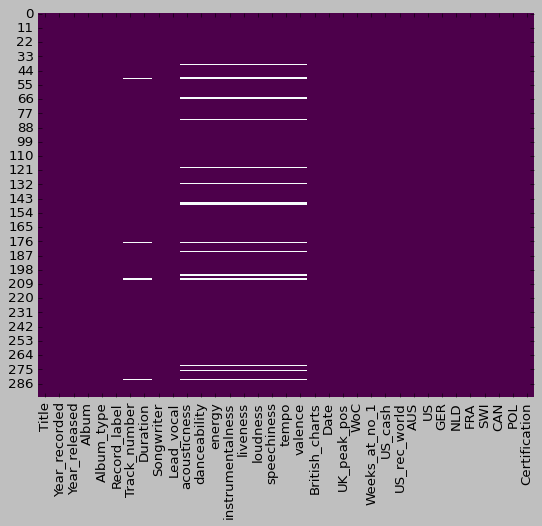

In [17]:
# Display the heatmap (missing values) of the songs dataset 
# (demonstrate using sb.heatmap() vs. sb.heatmap();)
sb.heatmap(songs.isna(), cbar=False, cmap='BuPu_r')

How many missing values are there? (`<pd.df>.isna().sum()` for all columns, `<pd.df>.['<column>'].isna().sum()` for a specific column, `<pd.df>.isna()[['<column1>', 'column2', ...]].sum()` for selected multiple columns; `isnull()` is the same as `isna()`, and `isna()` is used more often).

In [21]:
songs.isna().sum()
songs.isna()[['danceability', 'energy']].sum()

danceability    16
energy          16
dtype: int64

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

Take a sample of the dataset to get a feeling of what's in there.

In [23]:
songs.sample(4)

,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,...,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
108,Hot Stuff,1975,1976,Black and Blue,Studio,Virgin,1.0,5:21,Jagger/Richards,Jagger,...,-,-,49,-,-,-,-,-,-,-
194,Parachute Woman,1968,1968,Beggars Banquet,Studio,ABKCO Records,4.0,2:20,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
85,"Good Times, Bad Times",1964,1964,12 X 5,Studio,ABKCO Records,5.0,2:31,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
140,Let It Bleed,1969,1969,Let It Bleed,Studio,ABKCO Records,5.0,5:27,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-


What are the songs that have *some* missing values? 
Use masking to create the index of such elements; e.g. `<i>`, e.g., `<i> = songs.isna().sum() > 0` and show the type of the result (it's a `pd.Series` object).
Display `<i>.index` and `<i>.values`. 

In [109]:
i = songs.isna().sum() > 0
i
# type(i)
i.index
# i.values
i[i]
i[i].index

Index(['Track_number', 'Duration', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

From the `pd.Series` object `<i>` retrieved in the previous step, select the elements that have the values > 0 (i.e., the names of the columns that have some `NaN` values) - `<i>[<i>.values > 0]`, `<songs_with_NaNs> = songs.isna().sum()[i]`.

In [35]:
i[i.values > 0]
songs_with_NaNs = songs.isna().sum()[i]

How many `NaN`s are there in each column that has `NaN`s?

In [34]:
songs_with_NaNs

Track_number         4
Duration             4
acousticness        16
danceability        16
energy              16
instrumentalness    16
liveness            16
loudness            16
speechiness         16
tempo               16
valence             16
dtype: int64

What are the songs with missing `Duration` values?

Using `isna()`, `loc[]`, `iloc[]`, `len()` and `index`.

Calling `loc[]` effectively means *creating a subset* (typically based on a relational or logical expression over one or more columns of the dataset). In other words, `loc[]` creates a *slice* of the dataframe, so the type of the result is `<pd.df>`.

Note that `loc[]` works as `loc[<selected rows>, <selected columns>]`. The indices `<selected rows>` and `<selected columns>` can be created either directly in `loc[]` or beforehand.

If defining the <selected rows> index to be used with `loc[]` subsequently, it is a good practice to define it as a boolean *mask* over a single column, like `<pd.df>['<column>'].isna()`, or as a logical expression in which each chunk is a relational expression over a single column, e.g. `<pd.df>['<column1>'].isna() & <pd.df>['<column2>'] < 23`. The result will be a subset of the original dataframe (i.e., another `<pd.df>`).

Defining the relevant index with a statement like `<pd.df>.loc[<pd.df>['<column>'].isna()].index` is a good starting point when using `iloc[]` subsequently.

If using `iloc[]`, don't forget the `.index` chunk in the statement used to create the index (such as `<pd.df>.loc[<pd.df>['<column>'].isna()].index`). Without it, the result is another `<pd.df>`.

In [112]:
# Define i_iloc, the index to be used with iloc[], starting from <i> = <pd.df>['<column>'].isna();
# iloc[] can be used conveniently here if the relevant index is already defined with <pd.df>.loc[<i>].index, i.e. <pd.df>.loc[<pd.df>['<column>'].isna()].index;
# remember that the second index in iloc[] must be a number too (the relevant column index)
i = songs.Duration.isna()
i_iloc = songs.loc[i].index
i_iloc
songs.iloc[i_iloc, [0, 7]]

# Define i_loc, the index (boolean mask) to be used with loc[]
i_loc = songs.Duration.isna()
songs.loc[i_loc, ['Title', 'Duration']]

# display(songs.loc[i_loc.index, ['Title', 'Album']])
# display(songs.iloc[i_iloc, [0, 2]])

Index([50, 177, 205, 283], dtype='int64')

Replace `NaN` values in `Duration` with 'No'.

In [46]:
# Make the replacement and display it
songs.loc[i_loc, 'Duration'] = 'No'
songs.loc[i_loc, 'Duration']

50     No
177    No
205    No
283    No
Name: Duration, dtype: object

Double-check the missing values now:

In [48]:
# Use <pd.df>.Duration.isna().sum(), or <pd.df>.isna().sum()['Duration'] or sb.heatmap(<pd.df>.isna(), cmap='...')
songs.Duration.isna().sum()

0

How many songs from The Rolling Stones early years are there?

In [51]:
# Define early years using a list comprehension
early_years = [y for y in range(1963, 1967)]
early_years
# Display the songs from the early years using a combination of <pd.df>.loc[] and isin()
songs.loc[songs.Year_released.isin(early_years)]


,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,...,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
0,19th Nervous Breakdown,1965,1966,Got Live If You Want It!,Live,ABKCO Records / Universal,8.0,3:31,Jagger/Richards,Jagger,...,2,-,2,1,2,19,-,9,-,-
4,2120 South Michigan Avenue,1964,1964,12 X 5,Studio,ABKCO Records,7.0,3:39,Nanker Phelge[a],instrumental,...,-,-,-,-,-,-,-,-,-,-
16,Around And Around,1964,1964,Love You Live,Live,Virgin,4.0,3:52,Chuck Berry,Jagger,...,-,-,-,-,-,-,-,-,-,-
17,As Tears Go By,1965,1965,December's Children (And Everybody's),Studio,ABKCO Records,9.0,2:46,Jagger/Richards/Loog Oldham,Jagger,...,6,-,6,8,-,22,-,1,-,-
30,Blue Turns To Grey,1965,1965,December's Children (And Everybody's),Studio,ABKCO Records,11.0,2:29,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Under My Thumb,1966,1966,Got Live If You Want It!,Live,ABKCO Records / Universal,1.0,2:54,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
275,Under The Boardwalk,1964,1964,The Rolling Stones No.2,Studio,Decca,8.0,2:46,Kenny Young/Arthur Rednick,Jagger,...,-,-,-,-,-,-,-,-,-,-
280,What A Shame,1964,1965,"The Rolling Stones, Now!",Studio,ABKCO Records,5.0,3:06,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
290,You Better Move On,1963,1964,December's Children (And Everybody's),Studio,ABKCO Records,3.0,2:40,Arthur Alexander,Jagger,...,-,-,-,-,-,-,-,-,-,-


### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>.<column>.groupby()`, `<pd.df>.groupby('<column>')`, `<pd.df>.groupby('<column>').get_group(<value>)`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


How many unique values for `Year_released` are there in the dataset (`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`)?

In [53]:
songs.Year_released.nunique()

30

Group the songs in the dataset by the year of release (`<pd.df>.<column>.groupby()`, `<pd.df>.groupby('<column>')`, `<pd.df>.groupby('<column>').get_group(<value>)`). The result can be `songs_by_year`. Display it, show its type, and explore its individual groups and their types.

In [55]:
songs_by_year = songs.groupby('Year_released')
songs_by_year
songs_by_year.get_group(1964)

,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,...,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
4,2120 South Michigan Avenue,1964,1964,12 X 5,Studio,ABKCO Records,7.0,3:39,Nanker Phelge[a],instrumental,...,-,-,-,-,-,-,-,-,-,-
16,Around And Around,1964,1964,Love You Live,Live,Virgin,4.0,3:52,Chuck Berry,Jagger,...,-,-,-,-,-,-,-,-,-,-
37,Carol,1964,1964,Get Yer Ya-Ya's Out!,Live,ABKCO Records,2.0,3:46,Chuck Berry,Jagger,...,-,-,-,-,-,9,-,-,-,-
45,Confessin' The Blues,1964,1964,12 X 5,Studio,ABKCO Records,2.0,2:48,Jay McShann/Walter Brown,Jagger,...,-,-,-,-,-,-,-,-,-,-
46,Congratulations,1964,1964,12 X 5,Studio,ABKCO Records,9.0,2:29,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
68,Empty Heart,1964,1964,12 X 5,Studio,ABKCO Records,3.0,2:38,Nanker Phelge[a],Jagger,...,-,-,-,-,-,-,-,-,-,-
85,"Good Times, Bad Times",1964,1964,12 X 5,Studio,ABKCO Records,5.0,2:31,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
87,Grown Up Wrong,1964,1964,The Rolling Stones No.2,Studio,Decca,6.0,1:50,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
96,Heart Of Stone,1964,1964,"The Rolling Stones, Now!",Studio,ABKCO Records,4.0,2:49,Jagger/Richards,Jagger,...,15,-,19,-,6,24,15,-,-,-
122,If You Need Me,1964,1964,12 X 5,Studio,ABKCO Records,11.0,2:05,Wilson Pickett/Robert Bateman,Jagger,...,-,-,-,-,-,-,-,-,-,-


How many songs are there in the dataset for each `Year_released` (`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts()[<year>]`, `<pd.df>['<column>'].value_counts().sort_index()`)?

Note that `value_counts()` returns a `pd.Series` object, with the index equal to `<pd.df>['<column>'].unique()` values.

In [57]:
songs.Year_released.value_counts()
songs.Year_released.value_counts().sort_index()

Year_released
1964    18
1965    30
1966    18
1967    25
1968     9
1969     9
1970     1
1971    10
1972    18
1973    10
1974    10
1975     2
1976     6
1977     2
1978    10
1980    10
1981    11
1982     2
1983    10
1986    11
1989    12
1991     2
1994    15
1995     2
1997    13
1998     1
2004     2
2005    15
2008     1
2016    12
Name: count, dtype: int64

Sort the songs from the dataset by the year of release (`<pd.df>.sort_values(by='<column name>', ascending=False/True)`).
(It is also possible to use `inplace=True` in `sort_values()`, but it will change the order of songs in the dataset from that point on.)

In [111]:
songs.sort_values(by='Year_released', ascending=False)
# songs.index

,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,...,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
43,Commit A Crime,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,2.0,3:38,Howlin' Wolf,Jagger,...,-,-,-,-,-,-,-,-,-,-
135,Just Your Fool,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,1.0,2:16,Buddy Johnson,Jagger,...,-,-,-,-,-,-,-,-,-,-
107,Hoo Doo Blues,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,9.0,2:36,Otis Hicks/Jerry West,Jagger,...,-,-,-,-,-,-,-,-,-,-
112,I Can't Quit You Baby,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,12.0,5:13,Willie Dixon,Jagger,...,-,-,-,-,-,-,-,-,-,-
29,Blue And Lonesome,2015,2016,Blue & Lonesome,Studio,Interscope / Polydor,3.0,3:07,Memphis Slim,Jagger,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,If You Need Me,1964,1964,12 X 5,Studio,ABKCO Records,11.0,2:05,Wilson Pickett/Robert Bateman,Jagger,...,-,-,-,-,-,-,-,-,-,-
129,It's All Over Now,1964,1964,12 X 5,Studio,ABKCO Records,6.0,3:27,Bobby Womack/Shirley Womack,Jagger,...,33,-,26,14,1,7,-,26,-,-
96,Heart Of Stone,1964,1964,"The Rolling Stones, Now!",Studio,ABKCO Records,4.0,2:49,Jagger/Richards,Jagger,...,15,-,19,-,6,24,15,-,-,-
262,Time Is On My Side,1964,1964,Got Live If You Want It!,Live,ABKCO Records / Universal,9.0,2:49,Norman Meade/Jimmy Norman,Jagger,...,28,-,6,10,11,4,3,-,-,-


Group the songs in the dataset by the year of release and display `mean` and/or `max` duration of the songs in each year, as well as the number (`count`) of songs in each year (`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`), `<pd.df>.groupby('<column>').<another column>.agg(['f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`, `max()`,...)).
If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.

In [60]:
# To make all strings in songs.Duration look alike, insert placeholder values of the form 'mm:ss' 
# for those that are NaN, or that have been previously set to 'No', or the like
i = songs.Duration == 'No'
songs.loc[i, ['Title', 'Duration']]

songs.loc[i, 'Duration'] = '0:00'
songs.loc[i, ['Title', 'Duration']]

,Title,Duration
50,Corinna,0:00
177,The Nearness Of You,0:00
205,Rock Me Baby,0:00
283,Who's Been Sleeping Here,0:00


In [64]:
# Make sure that now all strings in songs.Duration are of the form 'mm:ss', i.e. they contain ':'
# using len(songs.Duration.str.contains(':'))
len(songs.Duration.str.contains(':'))

297

In [67]:
# Convert Duration to int

# Define to_sec() function that converts a single string of the form 'mm:ss' to int

def to_sec(time: str) -> int:
    min, sec = time.split(':')
    return int(min) * 60 + int(sec)

# to_sec('2:30')

# Use <pd.df>.<column>.apply(<function>) to convert the entire Duration column to int
songs.Duration = songs.Duration.apply(to_sec)
songs


,Title,Year_recorded,Year_released,Album,Album_type,Record_label,Track_number,Duration,Songwriter,Lead_vocal,...,US_rec_world,AUS,US,GER,NLD,FRA,SWI,CAN,POL,Certification
0,19th Nervous Breakdown,1965,1966,Got Live If You Want It!,Live,ABKCO Records / Universal,8.0,211,Jagger/Richards,Jagger,...,2,-,2,1,2,19,-,9,-,-
1,100 Years Ago,1972,1973,Goats Head Soup,Studio,Interscope / Polydor,2.0,238,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
2,2000 Light Years From Home,1967,1967,Their Satanic Majesties Request,Studio,ABKCO Records,9.0,285,Jagger/Richards,Jagger,...,-,-,-,5,3,-,-,-,-,-
3,2000 Man,1967,1967,Their Satanic Majesties Request,Studio,ABKCO Records,4.0,187,Jagger/Richards,Jagger,...,-,-,-,-,-,-,-,-,-,-
4,2120 South Michigan Avenue,1964,1964,12 X 5,Studio,ABKCO Records,7.0,219,Nanker Phelge[a],instrumental,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,You Can't Catch Me,1964,1965,"The Rolling Stones, Now!",Studio,ABKCO Records,3.0,220,Chuck Berry,Jagger,...,-,-,-,-,-,-,-,-,-,-
293,You Don't Have To Mean It,1997,1997,Bridges to Babylon,Studio,Virgin,6.0,223,Jagger/Richards,Richards,...,-,-,-,-,-,-,-,-,-,-
294,You Got Me Rocking,1993,1994,No Security,Live,Virgin,2.0,208,Jagger/Richards,Jagger,...,-,-,-,-,39,-,-,29,32,-
295,You Got The Silver,1969,1969,Let It Bleed,Studio,ABKCO Records,7.0,170,Jagger/Richards,Richards,...,-,-,-,-,-,-,-,-,-,-


In [69]:
# Make the groupings and aggregations

# <pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)
songs.groupby('Year_released').Duration.max().sort_values(ascending=False)

# <pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)
songs.groupby('Year_released').Duration.agg(['count', 'mean', 'max']).sort_values(by='count', ascending=False)


,count,mean,max
Year_released,,,
1965,30,158.866667,253
1967,25,194.440000,308
1964,18,173.944444,273
1966,18,209.222222,695
1972,18,223.888889,318
2005,15,241.533333,310
1994,15,247.533333,375
1997,13,308.000000,477
1989,12,240.500000,295


## Data visualization
Plot some scatterplots, line plots, bar graphs, histograms, scatterplots, box plots, violins, heatmaps,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

[Matplotlib examples](https://matplotlib.org/stable/gallery/index.html)
[Seaborn examples](https://seaborn.pydata.org/examples/index.html) (see also [The Python Graph Gallery](https://www.python-graph-gallery.com/); it has a very neat user interface!)
[Plotnine examples](https://plotnine.readthedocs.io/en/stable/api.html) (click on any element for its API and examples)

<u>**Note that it is also possible to**</u> <u>**[plot lines, bargraphs,... with Pandas only](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)**</u> (although in such cases Pandas interacts with Matplotlib under the surface).

##### Scatterplot

Read a slightly different dataset.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [70]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis.csv', 
# or from '../data/stones_analysis.csv.csv', or '../../data/stones_analysis.csv.csv', or ...,
# depending on where the csv file is located
songs = pd.read_csv('../data/stones_analysis.csv')

Check for missing values (use, e.g., `sb.heatmap(<pd.df>.isna(), cbar=False, cmap='viridis')`).

In [73]:
songs.isna().sum()

Title               0
Year_recorded       0
Year_released       0
Album               0
Record_label        0
Album_type          0
Track_number        0
Duration            0
Songwriter          0
Lead_vocal          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
British_charts      0
Date                0
UK_peak_pos         0
WoC                 0
US_cash             0
US_rec_world        0
AUS                 0
US                  0
GER                 0
NLD                 0
FRA                 0
SWI                 0
CAN                 0
POL                 0
Certification       0
dtype: int64

Scatterplot the relationship between `Duration` and `danceability`.

To set the ranges of values on x-axis and y-axis (`Duration`, `danceability`), check the max values or run `describe()`.

In [74]:
songs.describe()

,Year_recorded,Year_released,Track_number,Duration,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,1978.117845,1978.811448,6.723906,234.585859,0.265599,0.522416,0.734843,0.135566,0.258404,-7.078766,0.054398,123.946734,0.640086
std,14.226554,14.266461,3.864845,78.341898,0.241577,0.122905,0.187249,0.250240,0.197373,3.122111,0.035921,29.314429,0.213321
min,1963.000000,1964.000000,1.000000,28.000000,0.000058,0.230000,0.129000,0.000000,0.024500,-24.466000,0.023200,57.772000,0.042700
25%,1966.000000,1967.000000,4.000000,185.000000,0.065300,0.432000,0.589000,0.000246,0.113000,-9.278000,0.033800,105.219000,0.522000
50%,1973.000000,1974.000000,6.000000,226.000000,0.187000,0.522416,0.769000,0.006910,0.204500,-6.493000,0.042900,118.944000,0.668000
75%,1989.000000,1989.000000,9.000000,273.000000,0.441000,0.607000,0.905000,0.106000,0.341000,-4.568000,0.058800,140.398000,0.811000
max,2015.000000,2016.000000,20.000000,695.000000,0.994000,0.835000,0.997000,0.977000,0.978000,-1.426000,0.306000,217.578000,0.973000


###### 1. Matplotlib version

[Matplotlib scatterplot example](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

Use the following syntax:
`ax = plt.axes()`
`ax.set(xlim=(<from>, <to>), ylim=(<from>, <to>), xlabel='<xlabel>', ylabel='<ylabel>', title='<title>')`
`ax.scatter(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', c='<fill color>', edgecolors='<edgecolor>', s=<marker size>)`; 
the `<pd.df>['<X>']` and `<pd.df>['<Y>']` arguments can be also specified as `<pd.df>.<X>` and `<pd.df>.<Y>` if `<X>` and `<Y>` are single words.
The color parameter (`c`) is optional; if present, it should be a scalar or a sequence of length consistent with the lengths of `<X>` and `<Y>` (`(<X>, <Y>)` points). The `marker` parameter is optional as well. Both `c` and `marker` have defaults. For other values of `c` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle.markers), respectively. A good value for `s` is 30-40 for 200-300 markers on the plot.

Alternatively:
`ax.plot(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', color='<color>', linestyle='');`
The `linestyle=''` parameter is essential for plotting the dots only - omitting it means that the connecting lines are plotted as well.

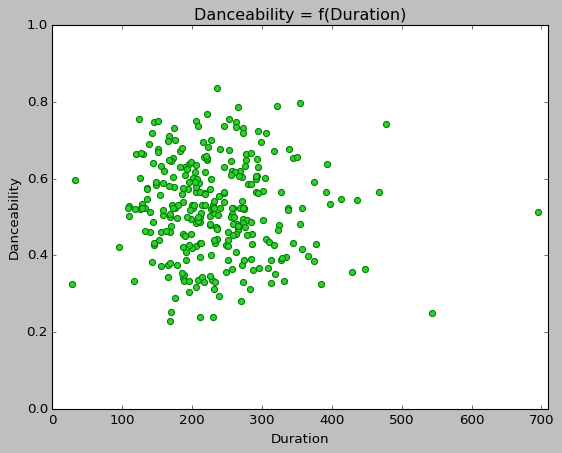

In [79]:
ax = plt.axes()
ax.set(xlim=(0, 710), ylim=(0, 1), xlabel='Duration', ylabel='Danceability', title='Danceability = f(Duration)')
ax.scatter(songs.Duration, songs.danceability, c='limegreen', edgecolors='green', s=30);
# ax

###### 2. Plotnine version
[Plotnine scatterplot example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html#plotnine.geoms.geom_point)

In *Plotnine*, the syntax for setting the ranges on x and y axes is `xlim(<from>, <to>)`, `ylim(<from>, <to>)` (as two separate lines in calling `ggplot()`), or, alternatively, `coord_cartesian(xlim=(<from>, <to>), ylim=(<from>, <to>))` as a single separate line.

If `<x>` and `<y>` values are not columns of a dataframe already (`<X>` and `<Y>`), create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as:

`(`
&emsp;&emsp;`ggplot(<df>, aes(x='<X>', y='<Y>) +`
&emsp;&emsp;`geom_point(color='<color>', fill='<fill color>', shape='<shape>', size=<size>) +`
&emsp;&emsp;`coord_cartesian(xlim=(<from>, <to>), ylim=(<from>, <to>)) +`
&emsp;&emsp;`theme(figure_size=(10, 7), dpi=60) +`
&emsp;&emsp;`labs(x='...', y='...', title='...')`
`).draw()`

The `color`, `fill` and `shape` parameters have defaults. The other values of these parameters are the same as in Matplotlib (see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively).

In `theme(figure_size=(10, 7), dpi=60)`, the `dpi` parameter is necessary to achieve full control over the plot size (`figure_size` is not enough). It is a good idea to experiment with the actual values for `figure_size`and `dpi`. 

**Note 1:** `aes(x='<X>', y='<Y>)` shows compiler errors but works anyway; `aes('<X>', '<Y>)` does not show any compiler error. However, `labs(x='...', y='...', title='...')` shows compiler errors regardless of `x=...`, `y=...`, ..., but works only *with* `x=...`, `y=...`. To eliminate these compiler errors, use `xlab('...')`, `ylab('...')` and `ggtitle('...')` as separate lines after calling `ggplot()`. 

**Note 2:** Once the figure size is changed for plotnine graphs by calling `theme(figure_size=(10, 7), dpi=60)` or similar, the Matplotlib graphs use the new figure size as well and how to control it is a mystery. 

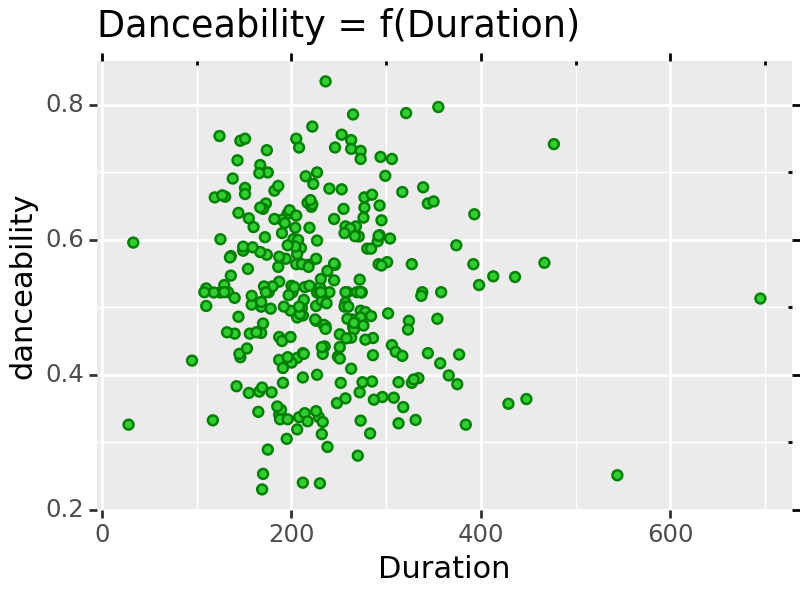

In [85]:
(
    ggplot(songs, aes('Duration', 'danceability')) + 
    geom_point(color='green', fill='limegreen') + 
    ggtitle('Danceability = f(Duration)') + 
    theme(figure_size=(4, 3))
).draw()

###### 3. A brief analysis of the plot: What are the shortest/longest songs and their durations?

In [87]:
# display(<pd.df>['column'] <= <value>)                                    # Boolean mask
# display(type(<pd.df>['column'] <= <value>))                              # pd.Series
# display(<pd.df>[<pd.df>['column'] <= <value>]['column to to display'])   # select one column
# display(<pd.df>[<pd.df>['column'] <= <value>]['column 1  to to display', 'column 2 to display',...])   # select multiple columns
songs.loc[songs.Duration > 500, ['Title', 'Duration']]
songs.loc[songs.danceability > 0.7, ['Title', 'danceability']]
# Try this also with .loc[], as well as with .iloc[], with an explicitly set index and with .index


,Title,danceability
22,Beast Of Burden,0.786
40,Cherry Oh Baby,0.835
55,Dance (Pt. 1),0.748
73,Feel On Baby,0.720
93,Harlem Shuffle,0.750
103,Hitch Hike,0.747
108,Hot Stuff,0.788
125,Indian Girl,0.735
139,"Laugh, I Nearly Died",0.723
150,Little Red Rooster,0.732


##### Line plot

How many songs from each year are there?

In [1]:
# Use <pd.df>['<column>'].value_counts(), <pd.df>['<column>'].value_counts()[<specific value> in <column>]


Sort this result by index: `pd.Series.sort_index()` (there is also `pd.DataFrame.sort_index()`).

In [2]:
# Define val_counts_sorted_by_index


Preparation for plotting (`counts` on y-axis, `year` on x-axis): get the `np.ndarray` version of `val_counts_sorted_by_index`, as well as of its index.

One way of doing it is to use `np.array()` over `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values`. However, the same effect is achieved using only `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values` (their type is `np.ndarray`).

And now plot it.

###### 1. Matplotlib version
[Matplotlib line plot example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html)

`ax = plt.axes()`
`ax.set(xlim=(<lower limit>, <upper limit>), ylim=(<lower limit>, <upper limit>), xlabel='...', ylabel='...', title='...')`
`ax.ticklabel_format(useOffset=False)`
`ax.plot(<x>, <y>, color='...', marker='<marker type>', linewidth=<number>, alpha=<number>)`

To prevent numbers displayed in scientific notation (exponential) on axes ticks, make sure to use `ax.ticklabel_format(useOffset=False)`.

Do not use `x=<x>, y=<y>` in `ax.plot()`, it generates an error. Use just `<x>, <y>`. For the other parameters, the keywords are necessary.

Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

###### 2. Plotnine version
[Plotnine line plot example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_line.html#plotnine.geoms.geom_line)
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/)

For some reasons, running the Matplotlib version immediately before running the Plotnine version sometimes resets all values in `year` to 1970 (!!!), so re-creating `year` here might be necessary.

In [ ]:
# year = np.array(val_counts_sorted_by_index.index)
# display(year)


If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as:

`(`
&emsp;&emsp;`ggplot(<df>, aes(<x> = '<X>', <y> = '<Y>) +`
&emsp;&emsp;`geom_line(color='<color>', size=<size>, alpha=<transparency, 0-1>, linetype='<linetype>') +`
&emsp;&emsp;`labs(x='...', y='...')`
`).draw()`

Examples of parameters in `geom_line()`: `color='steelblue'`, `size=1`, `linetype='solid'`, `alpha=0.8` (alpha: transparency (0-1)).


###### 3. Smoothen the curves
Based on [this](https://stackoverflow.com/a/5284038/1899061).
`from scipy.interpolate import make_interp_spline, BSpline`

`<x> = <definition of x-axis variable>`
`<y> = <definition of y-axis variable>`

`<x_smooth> = np.linspace(<x>.min(), <x>max(), 300)`&emsp;&emsp;&emsp;&emsp;# 300: the number of points to make between `<x>.min() and <x>.max()`
`spl = make_interp_spline(year, counts, k=3)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; # type: BSpline
`<y_smooth> = spl(<x>_smooth)`

`plt.xlim([<lowest value of x to show on the plot>, <highest value of x to show on the plot>])`
`plt.ylim([<lowest value of y to show on the plot>, <highest value of x to show on the plot>])`

`plt.plot(<x_smooth>, <y_smooth>)`
`plt.plot(<x>, <y>)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# optional: show the segmented line on the same plot as well
`plt.show()`



In [ ]:
# # 300 represents the number of points to make between T.min and T.max
# T = np.array([6, 7, 8, 9, 10, 11, 12])
# power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
#
# # plt.plot(T,power)
# # plt.show()
#
# xnew = np.linspace(T.min(), T.max(), 300)
#
# spl = make_interp_spline(T, power, k=3)  # type: BSpline
# power_smooth = spl(xnew)
#
# plt.plot(xnew, power_smooth)
# plt.show()

# from scipy.interpolate import make_interp_spline, BSpline
#
# year_smooth = np.linspace(year.min(), year.max(), 300)
# spl = make_interp_spline(year, counts, k=3)  # type: BSpline
# counts_smooth = spl(year_smooth)
#
# plt.ticklabel_format(useOffset=False)
# 
# plt.xlim([1963, 2023])
# plt.ylim([0, 40])
#
# plt.plot(year_smooth, counts_smooth)
# plt.plot(year, counts)
# plt.show()
#
# # Alternatively
# ax = plt.axes()
# ax.set(xlim=(years.min(), years.max()), ylim=(0, 70), xlabel='year', ylabel='count', title='Song counts over years')
# ax.plot(years, counts, color='steelblue', linewidth=2, marker='o', alpha=0.8)
# ax.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8);

###### 4. Multiple subplots
(shown here after [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html))

In [ ]:
# # From https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# fig = plt.figure()
# ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],
#                    xticklabels=[], ylim=(-1.2, 1.2))
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    ylim=(-1.2, 1.2))
# # Meanings of the numbers in [0.1, 0.55, 0.8, 0.4]:
# #     0.1 - distance from the left edge of fig (grey area)
# #     0.55 - distance between the upper and lower subplots (0.5: they touch each other)
# #     0.8 - distance from the right edge of fig (grey area)
# #     0.4 - area assigned to the upper/lower subplot (ax1/ax2) along the vertical axes
# # Experiment with these numbers to get a better feeling for them

# x = np.linspace(0, 10)
# ax1.plot(np.sin(x))
# ax2.plot(np.cos(x));

# fig, ax = plt.subplots()
# ax


# fig = plt.figure()
# # fig
# ax1 = fig.add_axes([0.1, 0.65, 0.8, 0.4],
#                    xlim=(1961, 1980), ylim=(0, 70),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    xlim=(1961, 1970), ylim=(0, 70),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# # display(type(ax1))
#
# ax1.plot(year, counts, color='steelblue', linewidth=3, alpha=0.8)    # alpha: transparency (0-1)
# ax2.plot(year, counts, color='purple', linewidth=3, alpha=0.8);    # alpha: transparency (0-1)

##### Histogram

Use Pandas to extract song lengths as a `pd.Series` object (`<pd.Series object> = <pd.df>['<column>']`).

In [1]:
# Get the song lengths as a pd.Series object


In [2]:
# Convert the song lengths into a NumPy array (using <song lengths>.to_numpy() or np.array(<song lengths>))


###### 1. Matplotlib version
[Matplotlib histogram example](https://matplotlib.org/stable/gallery/statistics/hist.html)

Plot the histogram of the song lengths using Matplotlib.

Minimal version: `plt.hist(<x>, bins=<number of bins>);`

Alternatively:
`ax = plt.axes()`
`ax.set(xlabel='...', ylabel='...', title='...')`
`ax.hist(<x>, bins=<number of bins>)`

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme(palette='...')` (or just `sb.set()`, but that function might get deprecated and removed from *Seaborn* in the future). See [`sb_set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults. For `palette='...'` use any of the palettes shown with `plt.style.available`, or any of [these](https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative), or...

In [3]:
# Set plot style using sb.set_theme(palette='Palette2')

# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins

# Minimal version

# A more detailed version


###### 2. Plotnine version
[Plotnine histogram example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html#plotnine.geoms.geom_histogram)

Plot the histogram of the song lengths using *Plotnine*.

A minimal, but effective version:
`plot = ggplot(songs, aes(x='<x>'))`
`plot + geom_histogram(bins=40)`

A more detailed version:
`(`
&emsp;&emsp;`ggplot(songs, aes(x='<x>')) +`
&emsp;&emsp;`geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) +`
&emsp;&emsp;`labs(x='<x>', y='count', title='<title>')`
`).draw()`

[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

In [57]:
# Minimal version
# plot = ggplot(songs, aes(x='Duration'))
# plot + geom_histogram(bins=40)


To avoid the annoying text output like `<ggplot: (177159008578)>` under the plot, use the following syntax:

`(`
&emsp;&emsp;`ggplot(songs, aes(x='<x>')) +`
&emsp;&emsp;`geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) +`
&emsp;&emsp;`labs(x='<x>', y='count', title='<title>')`
`).draw()`

##### Bar graph

How many Rolling Stones songs have reached Billboard Top 50?

Read the dataset (`'../data/stones_analysis.csv'`) and make some minor transformations.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [4]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/stones_analysis.csv', or '../../data/stones_analysis.csv', or ..., 
# depending on where the csv file is located


Add another column, `Top100`: a song has reached the US Top 100 chart (`Yes`), or it hasn't (`No`).

Create the index of the songs that HAVE reached the US Top 100 chart : `i = songs.loc[songs['US'] != 'No'].index` or `i = np.array(songs.loc[songs['US'] != 'No'].index)`.

Change the values of `Top100` corresponding to the created index to `Yes`. **Make sure to work on a <u>copy</u> of the `Top100` columns (e.g., `top100 = songs.Top100.copy()`), to avoid the caveat of working on the dataframe directly.**

Check if the newly added `Top100` column is now OK. Try this using the index created in the previous step, as well as using `i = songs.loc[songs['US'] != 'No'].index` directly.

<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u> (`<pd.df>.to_csv('<path>')`)

###### Preparing the data for plotting the bar graph

Group the data - group the songs by the year of release.

Use `get_group(<year>)` to get all songs for a selected year and `value_counts()` over the resulting group's `Top100` column (showing the `Yes` and `No` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `Year_released` column and then `np.sort()` the results.

For y-axis, create the lists of the numbers of the songs that have reached the US Top 100 (`in_top100`) and of those that haven't (`not_in_top100`).
(Start from two empty lists. Loop over the sorted list of years created in the previous step, `get_group()` for each year and append the `value_counts()['Yes']` of the `Top100` column of the current year (`y['Top100']`) to `in_top50` if any of `y['Top100']` has the value `Yes`, otherwise append 0. Do the similar thing for `not_in_top100`. Display both lists in the end to double-check the result.)

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `in_top50` and `not_in_top50` as the columns, <u>and the sorted list of years created above as the index of the dataframe</u>.

In [5]:
# # The role-model example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)


[Pandas bargraph example](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

Use `ax = <pd.df>.plot.bar()` to plot the bargraph.

Relevant parameters:
- `rot=<rotation angle [degrees]>` for the x-axis labels
- `ylim=(<from>, <to>)`
- `color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}` (for a list of Matplotlib named colors, see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors))
- `edgecolor='<color of bin lines>'`
- `title='<title>'`
- `xlabel='<xlabel>'`
- `ylabel='<ylabel>'`
- `fontsize=<fontsize>` (for all text; suitable fontsizes are 10, 12,...)
- `stacked=True` (the bins for the same x-axis value stacked on top of one another)

The returned value (`ax`) is usually unnecessary and can be omitted.

##### Box plot
[Seaborn boxplot example](https://seaborn.pydata.org/generated/seaborn.boxplot.html) (used here as the role model)

For Seaborn color palette names see [this](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) or [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/). To list the names of some ('quantitative') Seaborn color palettes, use `sb.palettes.SEABORN_PALETTES.keys()` (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/) and [this](https://www.codecademy.com/article/seaborn-design-ii) for additional named palettes).

Read the dataset (`'data/stones_analysis_top100.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [6]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis_top100.csv', or from
# '../data/stones_analysis_top100.csv', or '../../data/stones_analysis_top100.csv.csv', or ..., depending on where the csv file is located


Use `sb.boxplot()` to plot some boxplots.

For a single-column boxplot, relevant parameters are `y=<pd.df>['column']` (for 'vertical' boxplot) or `x=<pd.df>['column']` (for 'horizontal' boxplot), and `palette='palette'` (e.g., 'Set3', 'pastel', ...; see the links above for other named color palettes).

For a multiple-column boxplot, relevant parameters are `data=<pd.df>[['column1', 'column2',...]]`, `orient='v'` (for 'vertical' boxplot) and `palette='palette'`.

In [7]:
# display(sb.palettes.SEABORN_PALETTES.keys())

# For a single column (e.g., Duration)
# # sb.boxplot(x=songs.Duration, palette='Set1');
# sb.boxplot(y=songs.Duration, palette='Set1');

# For multiple columns (e.g., energy and acousticness)


##### Violin plot
[Seaborn violin plot example](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Combines box plot and density plot. Based on [this](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and [this](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Read the dataset (`'data/stones_analysis_top100.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [8]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis_top100.csv', or from
# '../data/stones_analysis_top100.csv', or '../../data/stones_analysis_top100.csv.csv', or ..., depending on where the csv file is located


Use `sb.violinplot()` like: `sb.violinplot(x=<pd.df>.loc[<selected indices for <column 1>, '<column 1>'], y=<pd.df>['<column 2>'], palette='<palette>')`.

For example, if the violin plot should represent density/boxplot diagram of song `Duration` in certain `Year`s (`Year_released`s), then `<column 1>` is `Year` and `<column 2>` is `Duration`. Good values for `'<palette>'` are, e.g., 'Set3', 'pastel',...).

Try setting the index of selected observations both implicitly (directly in the `x` parameter) and explicitly (before the call to `sb.violinplot()`) and then using `x=<pd.df>.loc[<index>, '<column for x-axis>']`.

##### Heat map
[Seaborn heat map example](https://seaborn.pydata.org/generated/seaborn.heatmap.html) (used here as the role model)

To create a heatmap, create the corresponding pivot table first. [An intuitive visual explanation of pivot tables](https://support.microsoft.com/en-us/office/overview-of-pivottables-and-pivotcharts-527c8fa3-02c0-445a-a2db-7794676bce96#:~:text=A%20PivotTable%20is%20an%20interactive,unanticipated%20questions%20about%20your%20data.).


Read the dataset (`'data/stones_analysis_top100.csv'`). This dataset already has been saved when plotting the bar graph above, so it already has the `Top100` column.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [9]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis_top100.csv', or from
# '../data/stones_analysis_top100.csv', or '../../data/stones_analysis_top100.csv', 
# or ..., depending on where the csv file is located


Categorize songs according to their *valence*.
Insert a new column, e.g. `valence_category` and set it to the default value `Medium`. Then split the range of `valence` to five subranges, `very-Low` to `very_high` (find the `max()` of `valence` first). Each such a subrange is actually an index of selected songs, based on the value of `valence` (e.g., `very_low = songs['valence'] < 10`). Then use `<pd.df>.loc[<index of selected observations>, <relevant column>]` to change the default value `Medium` where appropriate (e.g., `songs.loc[very_low, 'valence_category'] = 'Very Low'`).

Rearrange the categories of `valence_category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values`: e.g. `loudness`
- `index`: to be shown on y-axis, e.g. `valence_category`
- `columns`: to be shown on x-axis, e.g. `Year_released`

In [10]:

# # Alternatively
# s = songs.pivot_table(values='Duration', index=['Very Low', 'Low', 'Medium', 'High', 'Very High'], columns='Year')

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).

It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap. Here `rc` stands for 'run command' - essentially, configurations which will execute when running the code. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).

Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use `'.0f'` to show int values in annotations, not scientific notation (`'g'` for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is 'icefire'

##### A fancier example
Average duration of songs over the years, represented as circles with sizes proportional to the numbers of songs.

In [11]:
# songs = pd.read_csv('data/stones_analysis.csv')
# songs_by_year = songs.groupby('Year_released')
# years = np.sort(songs.Year_released.unique())
# years
# 
# avg_duration = []
# for year in years:
#     avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
# avg_duration = np.array(avg_duration)
# 
# rng = np.random.RandomState(370)
# 
# colors = rng.choice(100, size=len(years), replace=False)          # random sample, no duplicates
# # display(colors)
# 
# sizes = []
# for year in years:
#     sizes.append(len(songs_by_year.get_group(year)) * 100)                  # sizes proportional to the numbers of songs
# 
# plt.title('Song duration over the years', fontdict={'size': 20})
# plt.xlabel('Year')
# plt.ylabel('Duration')
# plt.xlim(1961, 1971)
# plt.ticklabel_format(useOffset=False)
# plt.scatter(years, avg_duration,
#             c=colors, s=sizes, alpha=0.3,                                   # alpha: the level of transparency
#             cmap='Set1')                                                    # cmap: a pre-defined color map
# plt.colorbar();                                                             # show color scale

# # Alternatively, but without showing the colorbar
# ax = plt.axes()
# ax.set(xlabel='Year', ylabel='Duration', xlim=(1961, 1971),
#        title='Song duration over the years')
# ax.scatter(years, avg_duration,
#            c=colors, s=sizes, alpha=0.3,                                    # alpha: the level of transparency
#            cmap='Set1');                                                    # cmap: a pre-defined color map